In [1]:
# Import the usual suspects....
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


import pandas_datareader as pdr
import datetime as dt
import quandl


import pandas as pd
import numpy as np
import requests
from termcolor import colored as cl
from math import floor
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')


import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'



Bad key "text.kerning_factor" on line 4 in
C:\Users\44nas\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
import os
import pandas as pd

from get_api_df import *

In [3]:
ticker = get_api_df()

Python-dotenv could not parse statement starting at line 11


In [4]:
ticker.tail()

,open,high,low,close,volume
time,,,,,
2021-06-28 00:00:00-04:00,133.42,135.245,133.350,134.75,53815255
2021-06-29 00:00:00-04:00,134.82,136.490,134.350,136.33,55081959
2021-06-30 00:00:00-04:00,136.17,137.410,135.870,136.94,51014239
2021-07-01 00:00:00-04:00,136.60,137.330,135.760,137.27,46267213
2021-07-02 00:00:00-04:00,137.92,140.000,137.745,139.96,69160944


In [5]:
ticker['return'] = np.log(ticker['close'] / ticker['close'].shift(1))

In [6]:
ticker.dropna(inplace=True)

In [7]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    ticker[col] = ticker['return'].shift(lag)
    cols.append(col)
    
ticker.dropna(inplace=True)

In [8]:
ticker.tail(4)

,open,high,low,close,volume,return,lag_1,lag_2,lag_3,lag_4,lag_5
time,,,,,,,,,,,
2021-06-29 00:00:00-04:00,134.82,136.49,134.350,136.33,55081959,0.011657,0.012245,-0.002176,-0.002246,-0.002017,0.012619
2021-06-30 00:00:00-04:00,136.17,137.41,135.870,136.94,51014239,0.004464,0.011657,0.012245,-0.002176,-0.002246,-0.002017
2021-07-01 00:00:00-04:00,136.60,137.33,135.760,137.27,46267213,0.002407,0.004464,0.011657,0.012245,-0.002176,-0.002246
2021-07-02 00:00:00-04:00,137.92,140.00,137.745,139.96,69160944,0.019407,0.002407,0.004464,0.011657,0.012245,-0.002176


In [9]:
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [10]:
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                    multi_class='auto',
                                    max_iter=1000)

In [11]:
lm.fit(ticker[cols], np.sign(ticker['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [12]:
ticker['prediction'] = lm.predict(ticker[cols])

In [13]:
ticker['prediction'].value_counts() 

 1.0    51
-1.0    43
Name: prediction, dtype: int64

In [21]:
ticker.head()

,open,high,low,close,volume,return,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,strategy
time,,,,,,,,,,,,,
2021-02-19 00:00:00-05:00,130.24,130.7100,128.80,129.85,79960220,0.001058,-0.008653,-0.017576,-0.016534,0.001922,-0.001775,1.0,0.001058
2021-02-22 00:00:00-05:00,128.01,129.7200,125.60,126.01,93993093,-0.030019,0.001058,-0.008653,-0.017576,-0.016534,0.001922,-1.0,0.030019
2021-02-23 00:00:00-05:00,123.76,126.7100,118.39,125.85,148286878,-0.001271,-0.030019,0.001058,-0.008653,-0.017576,-0.016534,1.0,-0.001271
2021-02-24 00:00:00-05:00,124.94,125.5600,122.23,125.32,102399167,-0.004220,-0.001271,-0.030019,0.001058,-0.008653,-0.017576,-1.0,0.004220
2021-02-25 00:00:00-05:00,124.68,126.4585,120.54,121.00,134693926,-0.035080,-0.004220,-0.001271,-0.030019,0.001058,-0.008653,1.0,-0.035080


In [14]:
hits = np.sign(ticker['return'].iloc[lags:] *
              ticker['prediction'].iloc[lags:]).value_counts()

In [15]:
hits

 1.0    55
-1.0    34
dtype: int64

In [16]:
accuracy_score(ticker['prediction'],
              np.sign(ticker['return']))

0.6170212765957447

In [17]:
ticker['strategy'] = ticker['prediction'] * ticker['return']

In [18]:
ticker[['return','strategy']].sum().apply(np.exp)

return      1.079000
strategy    1.556346
dtype: float64

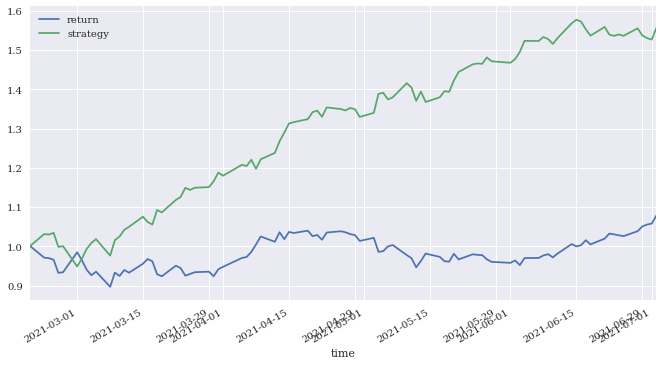

In [19]:
ticker[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [20]:
ticker.tail()

,open,high,low,close,volume,return,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,strategy
time,,,,,,,,,,,,,
2021-06-28 00:00:00-04:00,133.42,135.245,133.350,134.75,53815255,0.012245,-0.002176,-0.002246,-0.002017,0.012619,0.014390,1.0,0.012245
2021-06-29 00:00:00-04:00,134.82,136.490,134.350,136.33,55081959,0.011657,0.012245,-0.002176,-0.002246,-0.002017,0.012619,-1.0,-0.011657
2021-06-30 00:00:00-04:00,136.17,137.410,135.870,136.94,51014239,0.004464,0.011657,0.012245,-0.002176,-0.002246,-0.002017,-1.0,-0.004464
2021-07-01 00:00:00-04:00,136.60,137.330,135.760,137.27,46267213,0.002407,0.004464,0.011657,0.012245,-0.002176,-0.002246,-1.0,-0.002407
2021-07-02 00:00:00-04:00,137.92,140.000,137.745,139.96,69160944,0.019407,0.002407,0.004464,0.011657,0.012245,-0.002176,1.0,0.019407
